# Import Libraries

In [11]:
# General system libraries
import os
import sys
from IPython.display import Image, Markdown, display
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Dataframe libraries
import pandas as pd
from pandas import DataFrame, read_csv

# Number manipulation
import scipy.sparse
from scipy.ndimage.filters import generic_filter
import patsy
import numpy as np

# Plotting libaries
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
import PIL


# Data type libaries
from datetime import datetime as dt

# File manipulation
import pickle
import pandas.io.sql as pd_sql
from sqlalchemy import create_engine
import psycopg2 as pg
from flatten_json import flatten
from glob import glob


# NLP libraries
import wikipedia as wiki
from nltk import word_tokenize, sent_tokenize,FreqDist, pos_tag
from nltk.corpus import stopwords
import gensim as gn
from gensim import corpora, models, similarities
from collections import defaultdict
from six import iteritems
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from spacy.lang.en.stop_words import STOP_WORDS
import string
import emoji
# import enchant
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer


# Scraping libraries
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
# from scraping_functions.tumblr_api import get_client
# import pytumblr
from google_images_download import google_images_download

# Stats libaries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model, metrics
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import svm, datasets
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA, NMF, TruncatedSVD, LatentDirichletAllocation
from sklearn.neighbors import KNeighborsClassifier

# Data Storage
from boto.s3.connection import S3Connection
from boto.s3.key import Key

# Other libaries
import geopy

# Define a function to view and label images in notebook

In [54]:
def img2array(filepath):
    image_dict = {}
    image_list = []
    filenames_list = []
    
    for file in glob('{}/*'.format(filepath)):
        try:
            image = PIL.Image.open(file)
            if image.mode != 'RGB':
                image = image.convert(mode='RGB')
            image = np.fromstring(image.tobytes(), dtype='uint8').reshape((image.size[1], image.size[0], 3))
            image_dict[file] = [image, 1]
            image_list.append(image)
            filenames_list.append((file, 1))
        except Exception as e:
            print(e)

    return image_dict, image_list


In [55]:
image_dict, image_list = img2array('thinspo_google/anamia tumblr')

/home/victoria/anaconda3/envs/ds/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # Remove the CWD from sys.path while we load stuff.


In [57]:
image_dict

{'thinspo_google/anamia tumblr/199. oneburpeeatatime.tumblr.com_.png': [array([[[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
  
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
  
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
  
         ...,
  
         [[209, 235, 120],
          [209, 235, 120],
          [209, 235, 120],
          ...,
          [209, 235, 120],
          [209, 235, 120],
          [209, 235, 120]],
  
         [[209, 235, 120],
          [209, 235, 120],
          [209, 235, 120],
          ...,
          [209, 235, 120],
          [209, 235, 120],
          [209, 235, 120]],
  
        

In [56]:
len(image_list)

533

In [58]:
image_list

[array([[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        ...,
 
        [[209, 235, 120],
         [209, 235, 120],
         [209, 235, 120],
         ...,
         [209, 235, 120],
         [209, 235, 120],
         [209, 235, 120]],
 
        [[209, 235, 120],
         [209, 235, 120],
         [209, 235, 120],
         ...,
         [209, 235, 120],
         [209, 235, 120],
         [209, 235, 120]],
 
        [[209, 235, 120],
         [209, 235, 120],
         [209, 235, 120],
         ...,
         [209, 235, 120],
  

In [29]:
def display_images(np_images): 
    for idx, img in enumerate(np_images):
        plt.figure(figsize=(7,7))
        plt.title(idx)
        plt.axis('off')
        plt.imshow(img)

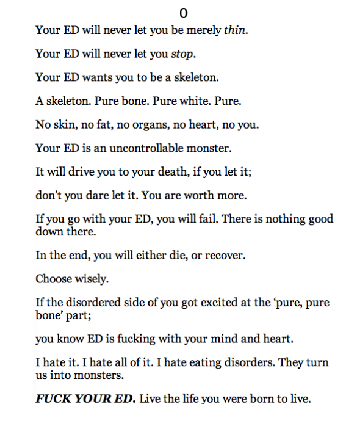

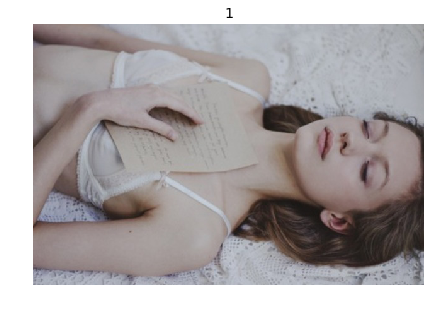

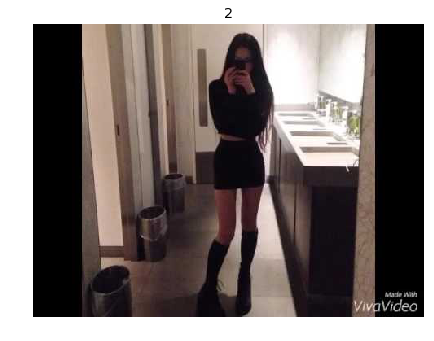

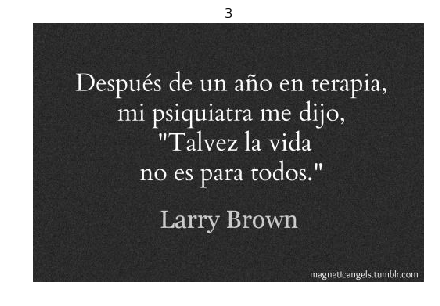

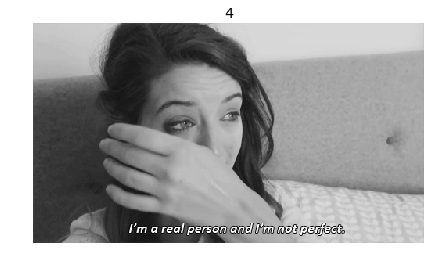

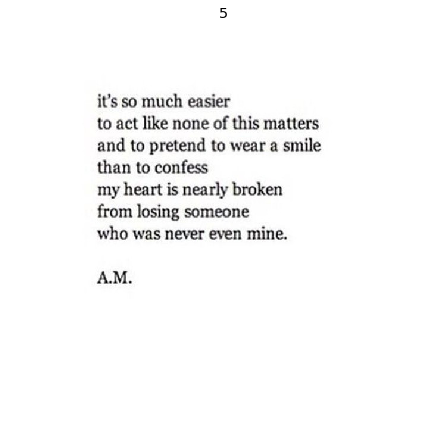

In [30]:
display_images(np_images)